In [3]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from skimage import io
from PIL import Image
from io import BytesIO
import requests
from skimage.util import view_as_windows

On va faire 2 clusters, et on va essayer de comprendre comment sont réparties les données dans ces dernier. Cela permettra d'exhiber des correlations entre variable (ex: y a il une correlation entre la classe A et le fait que la température soit inférieure à 3000 deg K ?)

In [4]:
# Importation des données
star_data = pd.read_csv ('data_star.csv')

In [5]:
# On enleve la classe de l'étoile pour faire de l'apprentissage supervisée
star_data_model_pd = star_data.drop(columns = ['Star category'])
star_data_model_pd = star_data_model_pd.drop(columns = ['Star type'])

# Encodage des données string en float afin de pouvoir utiliser des méthodes de mélanges gaussiens plus facilement
star_data_model_pd['Star color'], _ = pd.factorize(star_data_model_pd['Star color'])
star_data_model_pd['Spectral Class'], _ = pd.factorize(star_data_model_pd['Spectral Class'])

star_data_model_np = np.array(star_data_model_pd)

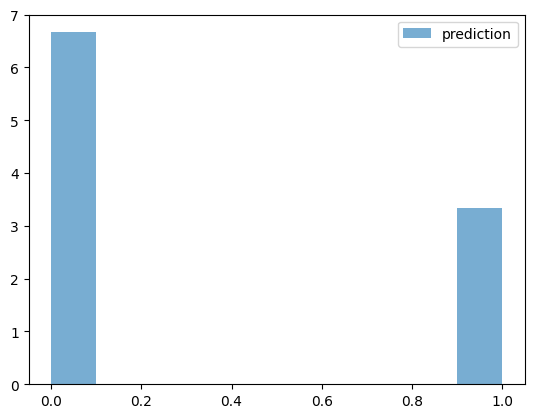

In [6]:
GMM_star_bic_categ = GaussianMixture(n_components = 2, covariance_type='diag', init_params = 'random_from_data')
GMM_star_bic_categ.fit(star_data_model_np)

Y_pred_bic_categ = GMM_star_bic_categ.predict(star_data_model_np)
plt.hist(Y_pred_bic_categ, density = True, alpha = 0.6, label = 'prediction')
#plt.hist(star_data_categ, density = True, alpha = 0.6, label = 'class')
plt.legend()
plt.show()

In [7]:
star_data_model_pd["Temperature < 5000K"] = star_data_model_pd["Temperature (K)"] < 5000

correlation_table = pd.crosstab(Y_pred_bic_categ, star_data_model_pd["Temperature < 5000K"])
print(correlation_table)

Temperature < 5000K  False  True 
row_0                            
0                      124     36
1                        0     80


Dans le cas précédent, la valeur de 5000 K a été prise en regardant simplement les données et en 'estimant' à la louche une valeur à partir de laquelle on pourrait être discriminant. 

In [8]:
temp_med = star_data_model_pd["Temperature (K)"].median()
print(temp_med)

5776.0


In [9]:
star_data_model_pd["Temperature < temp_med"] = star_data_model_pd["Temperature (K)"] < temp_med

correlation_table = pd.crosstab(Y_pred_bic_categ, star_data_model_pd["Temperature < temp_med"])
print(correlation_table)

Temperature < temp_med  False  True 
row_0                               
0                         120     40
1                           0     80


(array([9.68677912e-05, 3.82965686e-05, 2.92856113e-05, 1.57691753e-05,
        1.12636967e-05, 2.92856113e-05, 1.35164360e-05, 1.12636967e-05,
        1.12636967e-05, 1.35164360e-05]),
 array([ 3008. ,  6707.2, 10406.4, 14105.6, 17804.8, 21504. , 25203.2,
        28902.4, 32601.6, 36300.8, 40000. ]),
 <BarContainer object of 10 artists>)

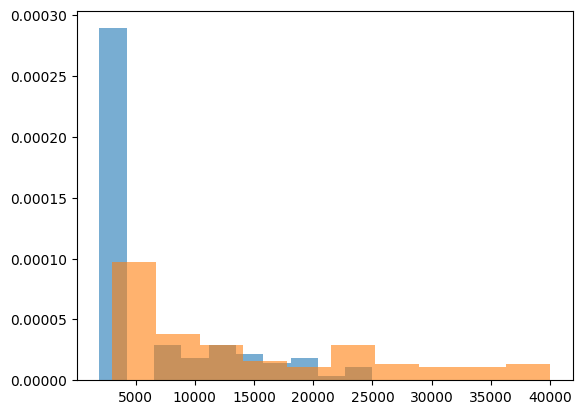

In [10]:
star_data_categ = star_data["Star category"].apply(lambda x: "Dwarf" if "Dwarf" in x else "Giant")
filtered_temps_dwarf = star_data_model_pd.loc[star_data_categ == "Dwarf", "Temperature (K)"]
filtered_temps_giant = star_data_model_pd.loc[star_data_categ == "Giant", "Temperature (K)"]
plt.hist(filtered_temps_dwarf, density = True, alpha = 0.6, label = 'prediction')
plt.hist(filtered_temps_giant, density = True, alpha = 0.6, label = 'prediction')

In [11]:
star_data_model_pd["petit rayon"] = star_data_model_pd["Radius (R/Ro)"] < 1

correlation_table = pd.crosstab(Y_pred_bic_categ, star_data_model_pd["petit rayon"])
print(correlation_table)

petit rayon  False  True 
row_0                    
0              113     47
1                0     80


0.73


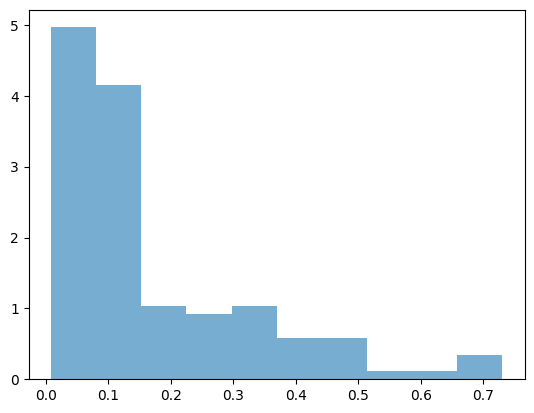

In [12]:
star_data_categ = star_data["Star category"].apply(lambda x: "Dwarf" if "Dwarf" in x else "Giant")
filtered_temps_dwarf = star_data_model_pd.loc[star_data_categ == "Dwarf", "Radius (R/Ro)"]
plt.hist(filtered_temps_dwarf, density = True, alpha = 0.6, label = 'prediction')
print(max(filtered_temps_dwarf))

0.795


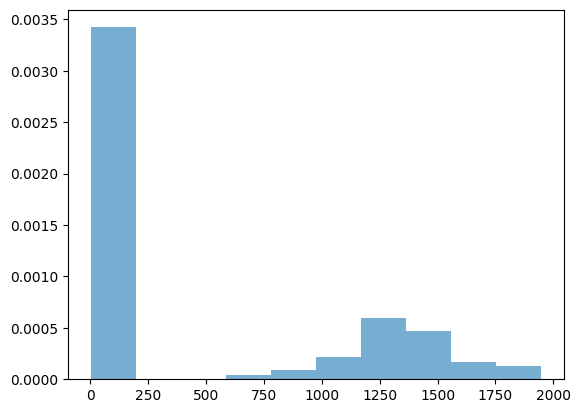

In [13]:
filtered_temps_giant = star_data_model_pd.loc[star_data_categ == "Giant", "Radius (R/Ro)"]
plt.hist(filtered_temps_giant, density = True, alpha = 0.6, label = 'prediction')
print(min(filtered_temps_giant))

In [24]:
star_data_model_pd["Radius (R/Ro) - log"] = np.log(star_data_model_pd["Radius (R/Ro)"])

Text(0.5, 1.0, 'radius')

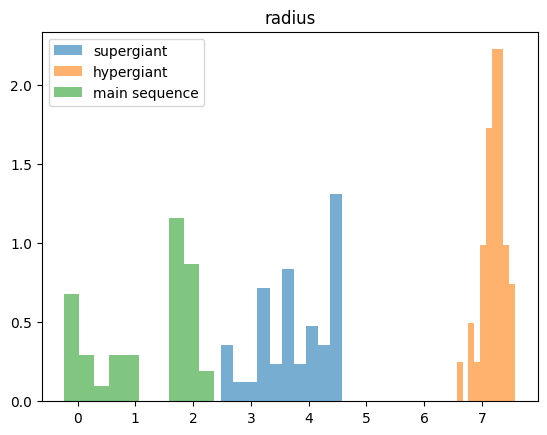

In [36]:
filtered_rad_hypergiant = star_data_model_pd.loc[star_data["Star category"] == 'Hypergiant', "Radius (R/Ro) - log"]
filtered_rad_supergiant = star_data_model_pd.loc[star_data["Star category"] == 'Supergiant', "Radius (R/Ro) - log"]
filtered_rad_main_seq = star_data_model_pd.loc[star_data["Star category"] == 'Main Sequence', "Radius (R/Ro) - log"]
plt.hist(filtered_rad_supergiant, density = True, alpha = 0.6, label = 'supergiant')
plt.hist(filtered_rad_hypergiant, density = True, alpha = 0.6, label = 'hypergiant')
plt.hist(filtered_rad_main_seq, density = True, alpha = 0.6, label = 'main sequence')
plt.legend()
plt.title('radius')

Text(0.5, 1.0, 'radius')

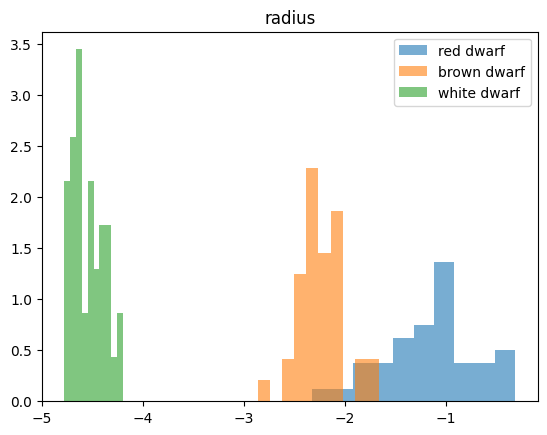

In [35]:
filtered_rad_redD = star_data_model_pd.loc[star_data["Star category"] == 'Red Dwarf', "Radius (R/Ro) - log"]
filtered_rad_brownD = star_data_model_pd.loc[star_data["Star category"] == 'Brown Dwarf', "Radius (R/Ro) - log"]
filtered_rad_whiteD = star_data_model_pd.loc[star_data["Star category"] == 'White Dwarf', "Radius (R/Ro) - log"]
plt.hist(filtered_rad_redD, density = True, alpha = 0.6, label = 'red dwarf')
plt.hist(filtered_rad_brownD, density = True, alpha = 0.6, label = 'brown dwarf')
plt.hist(filtered_rad_whiteD, density = True, alpha = 0.6, label = 'white dwarf')
plt.legend()
plt.title('radius')

Text(0.5, 1.0, 'radius')

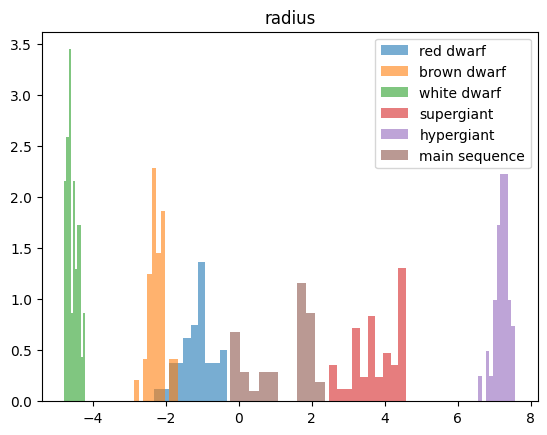

In [33]:
filtered_rad_redD = star_data_model_pd.loc[star_data["Star category"] == 'Red Dwarf', "Radius (R/Ro) - log"]
filtered_rad_brownD = star_data_model_pd.loc[star_data["Star category"] == 'Brown Dwarf', "Radius (R/Ro) - log"]
filtered_rad_whiteD = star_data_model_pd.loc[star_data["Star category"] == 'White Dwarf', "Radius (R/Ro) - log"]
plt.hist(filtered_rad_redD, density = True, alpha = 0.6, label = 'red dwarf')
plt.hist(filtered_rad_brownD, density = True, alpha = 0.6, label = 'brown dwarf')
plt.hist(filtered_rad_whiteD, density = True, alpha = 0.6, label = 'white dwarf')

filtered_rad_hypergiant = star_data_model_pd.loc[star_data["Star category"] == 'Hypergiant', "Radius (R/Ro) - log"]
filtered_rad_supergiant = star_data_model_pd.loc[star_data["Star category"] == 'Supergiant', "Radius (R/Ro) - log"]
filtered_rad_main_seq = star_data_model_pd.loc[star_data["Star category"] == 'Main Sequence', "Radius (R/Ro) - log"]
plt.hist(filtered_rad_supergiant, density = True, alpha = 0.6, label = 'supergiant')
plt.hist(filtered_rad_hypergiant, density = True, alpha = 0.6, label = 'hypergiant')
plt.hist(filtered_rad_main_seq, density = True, alpha = 0.6, label = 'main sequence')
plt.legend()
plt.title('radius')


In [28]:
star_data_model_pd["Luminosity (L/Lo) - log"] = np.log(star_data_model_pd["Luminosity (L/Lo)"])

Text(0.5, 1.0, 'luminosity')

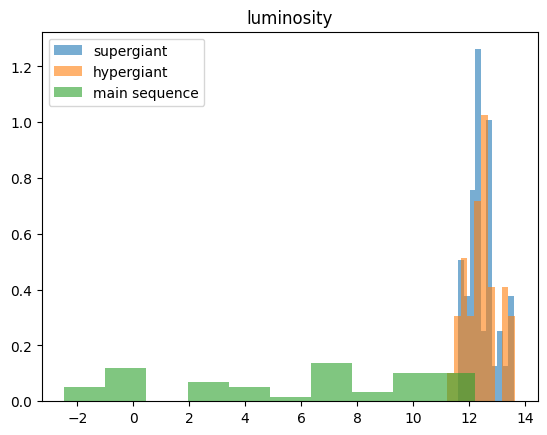

In [37]:
filtered_lum_hypergiant = star_data_model_pd.loc[star_data["Star category"] == 'Hypergiant', "Luminosity (L/Lo) - log"]
filtered_lum_supergiant = star_data_model_pd.loc[star_data["Star category"] == 'Supergiant', "Luminosity (L/Lo) - log"]
filtered_lum_main_seq = star_data_model_pd.loc[star_data["Star category"] == 'Main Sequence', "Luminosity (L/Lo) - log"]
plt.hist(filtered_lum_supergiant, density = True, alpha = 0.6, label = 'supergiant')
plt.hist(filtered_lum_hypergiant, density = True, alpha = 0.6, label = 'hypergiant')
plt.hist(filtered_lum_main_seq, density = True, alpha = 0.6, label = 'main sequence')
plt.legend()
plt.title('luminosity')

Text(0.5, 1.0, 'luminosity')

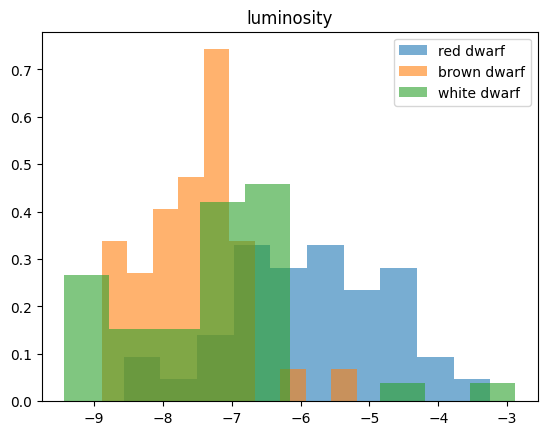

In [38]:
filtered_lum_redD = star_data_model_pd.loc[star_data["Star category"] == 'Red Dwarf', "Luminosity (L/Lo) - log"]
filtered_lum_brownD = star_data_model_pd.loc[star_data["Star category"] == 'Brown Dwarf', "Luminosity (L/Lo) - log"]
filtered_lum_whiteD = star_data_model_pd.loc[star_data["Star category"] == 'White Dwarf', "Luminosity (L/Lo) - log"]
plt.hist(filtered_lum_redD, density = True, alpha = 0.6, label = 'red dwarf')
plt.hist(filtered_lum_brownD, density = True, alpha = 0.6, label = 'brown dwarf')
plt.hist(filtered_lum_whiteD, density = True, alpha = 0.6, label = 'white dwarf')
plt.legend()
plt.title('luminosity')

Text(0.5, 1.0, 'luminosity')

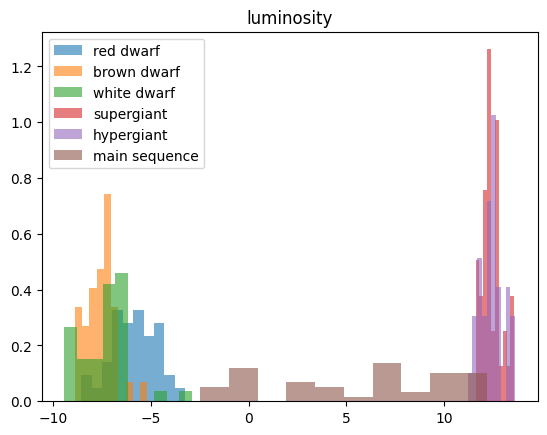

In [39]:
filtered_lum_redD = star_data_model_pd.loc[star_data["Star category"] == 'Red Dwarf', "Luminosity (L/Lo) - log"]
filtered_lum_brownD = star_data_model_pd.loc[star_data["Star category"] == 'Brown Dwarf', "Luminosity (L/Lo) - log"]
filtered_lum_whiteD = star_data_model_pd.loc[star_data["Star category"] == 'White Dwarf', "Luminosity (L/Lo) - log"]
plt.hist(filtered_lum_redD, density = True, alpha = 0.6, label = 'red dwarf')
plt.hist(filtered_lum_brownD, density = True, alpha = 0.6, label = 'brown dwarf')
plt.hist(filtered_lum_whiteD, density = True, alpha = 0.6, label = 'white dwarf')

filtered_lum_hypergiant = star_data_model_pd.loc[star_data["Star category"] == 'Hypergiant', "Luminosity (L/Lo) - log"]
filtered_lum_supergiant = star_data_model_pd.loc[star_data["Star category"] == 'Supergiant', "Luminosity (L/Lo) - log"]
filtered_lum_main_seq = star_data_model_pd.loc[star_data["Star category"] == 'Main Sequence', "Luminosity (L/Lo) - log"]
plt.hist(filtered_lum_supergiant, density = True, alpha = 0.6, label = 'supergiant')
plt.hist(filtered_lum_hypergiant, density = True, alpha = 0.6, label = 'hypergiant')
plt.hist(filtered_lum_main_seq, density = True, alpha = 0.6, label = 'main sequence')

plt.legend()
plt.title('luminosity')